In [1]:
import os

# Change the current working directory
os.chdir('/Users/payalteyung/Desktop/DA')

# Verify the change
print(os.getcwd())

/Users/payalteyung/Desktop/DA


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import re
import joblib
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
%matplotlib inline

In [3]:
df=pd.read_csv('news-dataset.csv',encoding='utf-8')

In [4]:
df.head()

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1


In [5]:
df.shape

(6000, 2)

In [6]:
df.tail()

,text,label
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1
5999,कार्यक्रम एकदमै सकारात्मक छ। निरन्तरता पाओस्।,1


In [7]:
#the datatypes of the fileds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5999 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [8]:
df.describe()

,text,label
count,5999,6000
unique,4040,8
top,दलाल भगाउ देश बचाउ,1
freq,11,2378


# Data Cleaning

In [9]:
#Finding missing values
df.isnull()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5995,False,False
5996,False,False
5997,False,False
5998,False,False


In [10]:
df.isnull().sum()

text     1
label    0
dtype: int64

there is one null value in text column

In [11]:
df= df.dropna()

In [12]:
df.shape[0]

5999

In [13]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
df_duplicate = df.duplicated().any()
print(df_duplicate)

True


In [15]:
# Find all instances of duplicate rows
all_duplicates = df[df.duplicated(keep='first')]


In [16]:
print(all_duplicates)


                                                   text label
228   यो भ्रस्टाचारि लाई किन येति घमण्ड ?? ७० करोड क...     0
229   गोकुले   भन्न बितिकै ७० करोड को मात्र  याद आउँ...     2
230   👉️ ७० करोडको अझै कति धेरै चुरिफुरी छ थुक्क हाम...     0
232   जसले जे सुकै भनेपनि गोकुल बास्कोटा  काभ्रेको ब...     1
233   यो मान्छेको थोप्डा देख्यो कि खोपडी गरम हुने म ...     0
...                                                 ...   ...
5600                                भेरी मा फालेको हैनर     2
5601  छुवाछूत भनेको कामी दमाई सार्की भित्र झन खतरा र...     0
5602  mcc को बारेमा किन बोल्दैनौ रबि जि । कि भाग आउन...     0
5603  हिजो दिनमा mcc बारे बिरोध गर्ने रबि लामिछाने अ...     0
5969  हाम्रो मुक्ति को आवाज उजागर गर्ने जातको प्रश्न...     1

[1476 rows x 2 columns]


Handling Invalid labels

In [17]:
print(df['label'].unique())

['2' '1' '0' '20' '11' '-' 'o' '--']


In [18]:
valid_labels = ['0', '1', '2']
df['label'] = df['label'].apply(lambda x: x if x in valid_labels else None)

In [19]:
df.dropna(subset=['label'], inplace=True)

In [20]:
df.shape[0]

5990

In [21]:
df.describe()

,text,label
count,5990,5990
unique,4035,3
top,दलाल भगाउ देश बचाउ,1
freq,11,2378


In [22]:
#Convert 'label' column to integers
df['label'] = df['label'].astype(int)

In [23]:
# Define label mapping
label_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

In [24]:
# Apply the mapping to the 'label' column
df['label'] = df['label'].map(label_mapping)

In [25]:
df.head()

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,Neutral
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,Positive
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,Neutral
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",Neutral
4,राम्रो भयो️️,Positive


In [26]:
# Define a function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^ँ-ःअ-ऋए-औक-ह०-९a-zA-Z0-9\sािीुूेैोौंंः]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    return text.strip()

In [27]:
# Apply cleaning function
df['text'] = df['text'].apply(clean_text)

In [28]:
# Step 2: Define a function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"  # other symbols
        "\U000024C2-\U0001F251"  # enclosed characters
        "]+", 
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

In [29]:
df['text'] = df['text'].apply(remove_emojis)

In [30]:
df.tail(30)

,text,label
5970,नेपाली समाजमा यो जात वयवसथा र यसको सामाजि चरित...,Positive
5971,धेरै रामरो बिषय को कुरा उठाउनु भएको छतर यदि यो...,Positive
5972,एकदम रामरो कारयकरम चलाइरहनु भएको छ राजेस सर ला...,Positive
5973,यस विषयमा धेरैमा चेतना आउन अझै जरुरी छ सहि कार...,Positive
5974,सामाजिक सदभावका लागि यो परयास अति उततम लागयो,Positive
5975,सिजन २ लयाउनु भएकोमा धेरै बधाइ,Positive
5976,एउटा समाज परिवरतनको कारयकरम कुनै वयकतिको परशन ...,Positive
5977,एकदम बाहुनबाद धेरै हावी छ यसको अनत हुन परदछ,Negative
5978,सफलताको सुभ कामना छ,Positive
5979,जात वयवसथा उनमुलनका लागि जात वयवसथाका बारेमा व...,Positive


# Feature Engineering

In [31]:
# Word Count
df['Word Count'] = df['text'].str.split().apply(len)

In [32]:
df.head()

,text,label,Word Count
0,बजार ले जसरी टरेनड चेनज गरयो यो हेरदा ततकाल पर...,Neutral,23
1,1000 अंकले घटेको नेपसे 200 अंकले बढनु ठूलो कुर...,Positive,16
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,Neutral,26
3,खैँ MBJC परति किततामा रू10ले बढेर आज रू1100 मा...,Neutral,11
4,रामरो भयो,Positive,2


In [33]:
# Sentence Count
df['Sentence Count'] = df['text'].apply( lambda x: len(re.findall(r'[^।!?]+', x)))

In [34]:
df.tail()

,text,label,Word Count,Sentence Count
5995,समाज परिवरतन गराउन लाई अरु को मुख हेरने भनदा प...,Positive,35,1
5996,Filmy कषेतरमा धेरै गरनु भयोअब समाज र देश को ला...,Neutral,22,1
5997,यसतै यसतै कारयकरम अझ बढी हुन जरुरी छ कुना कुना...,Neutral,32,1
5998,बधाई र सुभकामना,Positive,3,1
5999,कारयकरम एकदमै सकारातमक छ निरनतरता पाओस,Positive,6,1


In [35]:
def preprocess_text(text):
    words = word_tokenize(text)
    return words

In [36]:
stop_words = set(stopwords.words('english'))
nepali_stopwords = set([
    "अनि", "र", "को", "का", "छ", "हो", "प्रति", "तर", "जसरी", "के", "लाई", "मैले", "तिमी", "हामी", "उनका", 
    "उसको", "कसैले", "यहाँ", "त्यहाँ", "जसको", "साथ", "यसरी", "यो", "अहिले", "पनि", "शायद", "सके", "जस्तो", 
    "त्यो", "तपाईं", "साथै", "म", "तिमीलाई", "उहाँ", "कसको", "कुन", "जब", "केहि", "फेरि", "संग", "पहिले", 
    "तपाई", "त्यस्तो", "सम्भव", "हुनसक्छ", "है", "मात्र", "यस", "अर्को", "यदि", "तसर्थ", "त्यसैले", "आज", 
    "कल", "भने", "त्यहि", "केवल", "यसको", "साथमा", "धेरै", "यो", "कसै", "आफ्नो", "विकल्प", "अर्को", "केही", 
    "अरु", "समान", "कहिल्यै", "सजीलो", "थप", "पर", "आफू", "के", "राम्रो", "छ", "सम्भव", "जन्म", "मात्र", 
    "शायद", "सबै", "खास", "अब", "व्यक्तिगत", "नयाँ", "साधारण", "हामीले", "सुनिश्चित", "सपना", "द्वारा", 
    "उत्पन्न", "केही", "कसै", "आधिकारिक", "के", "कसैले", "हुन", "सम्भावना", "सीधा", "सम्भव", "जानकारी", 
    "प्रकार", "बारेमा", "माध्यम", "पनि", "एक", "अधिक", "न", "त", "धेरै", "चाहिन्छ", "तिनी", "कस", 
    "एकअर्कामा", "सार्वजनिक", "समीक्षा", "भएको", "आखिर", "ध्यान", "प्रत्येक", "त्यहाँ", "त्यस्तो", "कुनै", 
    "सिद्ध", "सजिलो", "राख्न", "अधिकार", "साथ", "सस्तो", "दृश्य", "समय", "तपाईं", "त्यो", "मा", "ले", 
    "कुरा", "नै", "हुनछ", "गरनु", "लागयो", "परछ", "लागि", "भयो", "हरु", "होला", "बाट", "किन", "गरने", 
    "भनने", "छैन", "तल", "माथि", "किनभने", "अहिलेसम्म", "तिनीहरू", "त्यसपछि", "त्यसपछिको", "अहिलेको", 
    "सधैं", "जहाँ", "तसर्थ", "त्यसरी", "जसले", "तथापि", "जबसम्म", "जहिलेसम्म", "त्यसकै", "त्यसलाई", 
    "त्यसमा", "त्यसले", "अधिकांश", "त्यही", "अर्थात्", "आफ्नै", "अनुसार", "त्यसको", "सामान्यतया", 
    "त्यस्ता", "सम्भवत", "वास्तवमा", "त्यति", "साँच्चै", "त्यतिखेर", "त्यति", "साथसाथै", "यसपछि", 
    "त्यसभन्दा", "पछाडि", "केसरी", "तत्काल", "थोरै", "सबैजसो", "यसैले", "सधैँ"
  ])
stop_words.update(nepali_stopwords)

In [37]:
# Preprocess the text and filter out stopwords
df['tokens'] = df['text'].apply(preprocess_text)

In [38]:
#Filter out stopwords
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [39]:
# Flatten all tokens from the 'tokens' column into a single list
all_tokens = [word for sublist in df['tokens'] for word in sublist] #overall word frequency

In [40]:
word_frequencies = Counter(all_tokens)

In [41]:
print(word_frequencies.most_common(20))

[('रबि', 1178), ('सर', 939), ('कारयकरम', 410), ('रामरो', 385), ('नेपाल', 356), ('शुभकामना', 340), ('देश', 319), ('रवि', 313), ('हजुर', 288), ('नेपाली', 279), ('मन', 271), ('दाइ', 268), ('जय', 253), ('नागरिकता', 253), ('हेम', 224), ('सलाम', 223), ('मेरो', 217), ('जनता', 216), ('नेता', 210), ('दिन', 205)]


In [42]:
#word frequency grouped by label
# Group by sentiment label
label_groups = df.groupby('label')['tokens'].apply(lambda x: [word for sublist in x for word in sublist])

In [43]:
# Create a frequency counter for each sentiment label
word_frequencies = label_groups.apply(lambda x: Counter(x))

In [44]:
# Print the most common words for each label
for label, freq in word_frequencies.items():
    print(f"Label {label} - Most Frequent Words/Phrases:")
    print(freq.most_common(10))  # Display top 10 most frequent words
    print("\n")

Label Negative - Most Frequent Words/Phrases:
[('रबि', 366), ('सर', 288), ('नागरिकता', 234), ('देश', 181), ('नेपाल', 168), ('चोर', 151), ('सरकार', 126), ('नेता', 118), ('तयो', 116), ('नेपाली', 114)]


Label Neutral - Most Frequent Words/Phrases:
[('रबि', 101), ('सर', 93), ('परचणड', 55), ('नेता', 55), ('परयो', 54), ('नेपाली', 52), ('करोड', 51), ('देश', 51), ('भिम', 49), ('कति', 48)]


Label Positive - Most Frequent Words/Phrases:
[('रबि', 711), ('सर', 558), ('शुभकामना', 337), ('कारयकरम', 281), ('रामरो', 253), ('जय', 194), ('हजुर', 185), ('रवि', 185), ('मन', 181), ('सलाम', 174)]




In [45]:
# Sample text data
text_data = df['text'].tolist()

In [46]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [47]:
# Fit and transform the data to get the TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [48]:
# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [49]:
# Display the TF-IDF representation
print(tfidf_df.head())

    01   03   10  100      1000  10000000  1000च  100great  100k  100सह  ...  \
0  0.0  0.0  0.0  0.0  0.000000       0.0    0.0       0.0   0.0    0.0  ...   
1  0.0  0.0  0.0  0.0  0.347836       0.0    0.0       0.0   0.0    0.0  ...   
2  0.0  0.0  0.0  0.0  0.000000       0.0    0.0       0.0   0.0    0.0  ...   
3  0.0  0.0  0.0  0.0  0.000000       0.0    0.0       0.0   0.0    0.0  ...   
4  0.0  0.0  0.0  0.0  0.000000       0.0    0.0       0.0   0.0    0.0  ...   

   ६३०  ६४००००   ७म   ७०  ७०क  ७०कर   ७२  ७३५   ७८   ७९  
0  0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  
1  0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  
2  0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  
3  0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  
4  0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  

[5 rows x 3842 columns]


In [50]:
df.head()

,text,label,Word Count,Sentence Count,tokens
0,बजार ले जसरी टरेनड चेनज गरयो यो हेरदा ततकाल पर...,Neutral,23,1,"[बजार, टरेनड, चेनज, गरयो, हेरदा, ततकाल, परोफिट..."
1,1000 अंकले घटेको नेपसे 200 अंकले बढनु ठूलो कुर...,Positive,16,1,"[1000, अंकले, घटेको, नेपसे, 200, अंकले, बढनु, ..."
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,Neutral,26,1,"[होइन, सानिमा, बैंक, bonus, घोसणा, गरेको, २, म..."
3,खैँ MBJC परति किततामा रू10ले बढेर आज रू1100 मा...,Neutral,11,1,"[खैँ, MBJC, परति, किततामा, रू10ले, बढेर, रू110..."
4,रामरो भयो,Positive,2,1,[रामरो]


# Exploratory Data Analysis(EDA)

Distribution of Sentiment Labels

In [51]:
print(df['label'].value_counts())

Positive    2378
Negative    2376
Neutral     1236
Name: label, dtype: int64


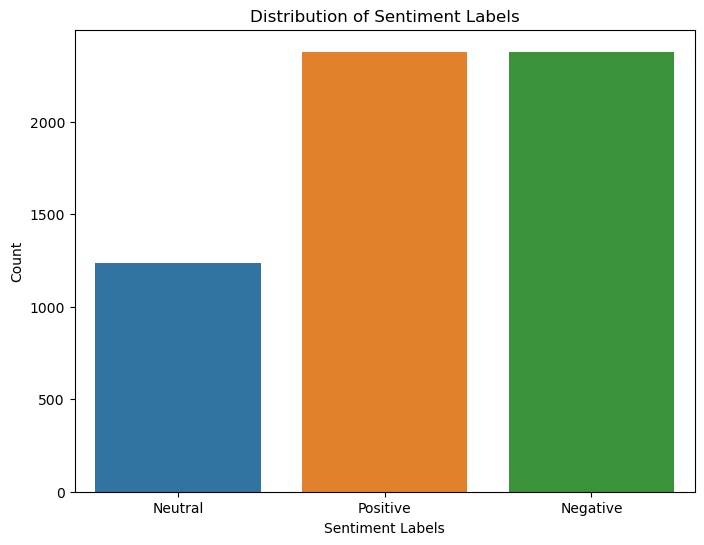

In [52]:
# Count plot for sentiment distribution with correct labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

In [53]:
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

In [54]:
# Function to get the top N frequent words from the text
def get_top_n_words(text, n=100):
    words = text.split()
    word_counts = Counter(words)
    return dict(word_counts.most_common(n))

In [55]:
# Filter text for each sentiment label
neutral_text = ' '.join(df[df['label'] == 'Neutral']['text'])
positive_text = ' '.join(df[df['label'] == 'Positive']['text'])
negative_text = ' '.join(df[df['label'] == 'Negative']['text'])

In [56]:
# Remove stopwords from each sentiment text
positive_text_cleaned = remove_stopwords(positive_text, nepali_stopwords)
neutral_text_cleaned = remove_stopwords(neutral_text, nepali_stopwords)
negative_text_cleaned = remove_stopwords(negative_text, nepali_stopwords)

In [57]:
# Get the top 100 words for each sentiment after removing stopwords
positive_top_words = get_top_n_words(positive_text_cleaned, 100)
neutral_top_words = get_top_n_words(neutral_text_cleaned, 100)
negative_top_words = get_top_n_words(negative_text_cleaned, 100)

In [58]:
nepali_font_path = '/Users/payalteyung/Downloads/MANGAL.TTF' 


In [59]:
# Generate word clouds with Nepali font using the top 100 words after removing stopwords
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=nepali_font_path).generate_from_frequencies(positive_top_words)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=nepali_font_path).generate_from_frequencies(neutral_top_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=nepali_font_path).generate_from_frequencies(negative_top_words)

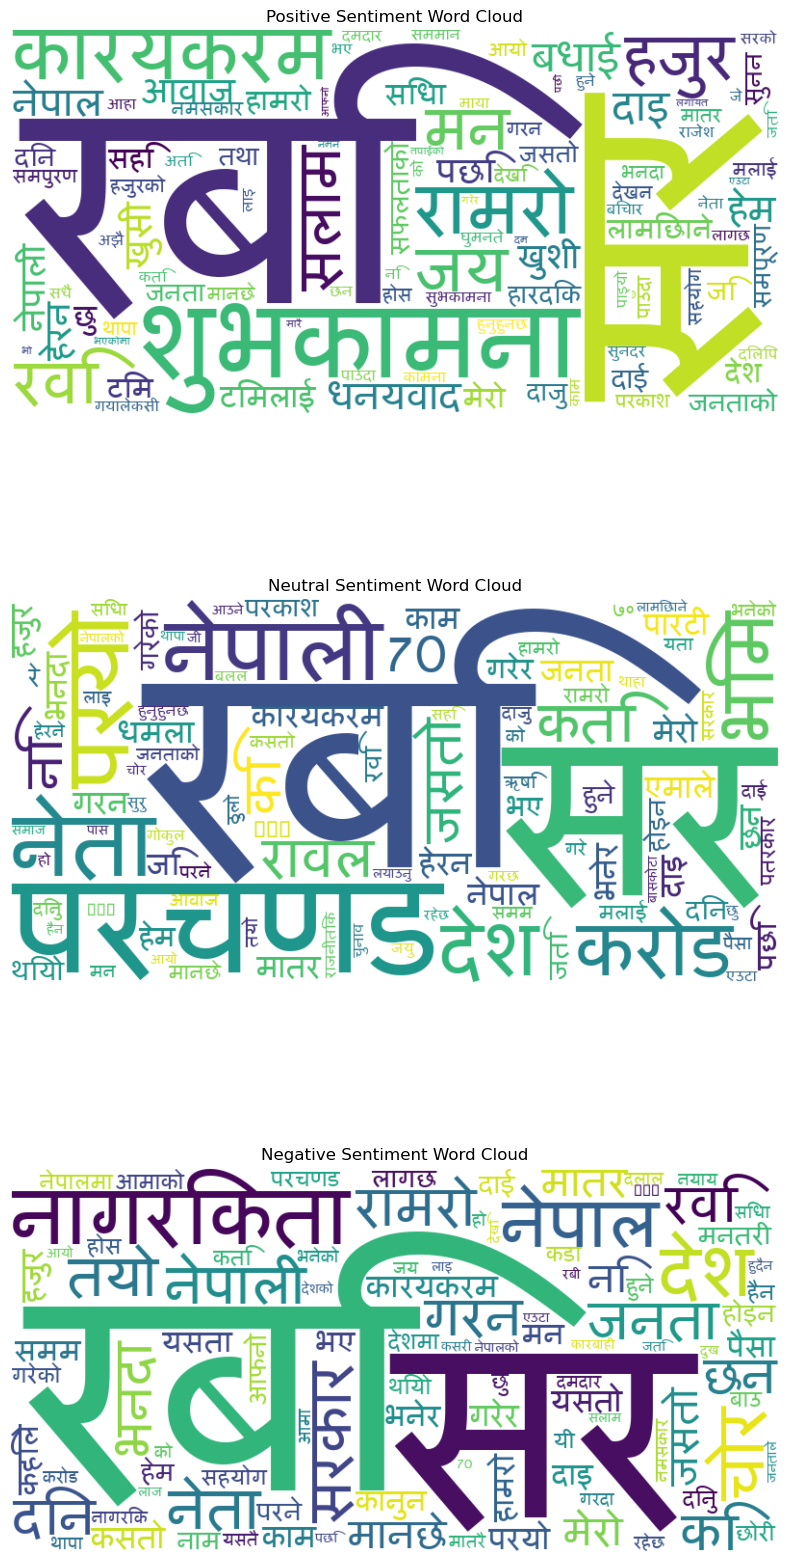

In [60]:
plt.figure(figsize=(8, 18))  

# Positive sentiment word cloud
plt.subplot(3, 1, 1)  
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

# Neutral sentiment word cloud
plt.subplot(3, 1, 2)  
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud')

# Negative sentiment word cloud
plt.subplot(3, 1, 3) 
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

# Display the word clouds
plt.tight_layout()  
plt.show()

In [61]:
df['text_length'] = df['text'].apply(len)

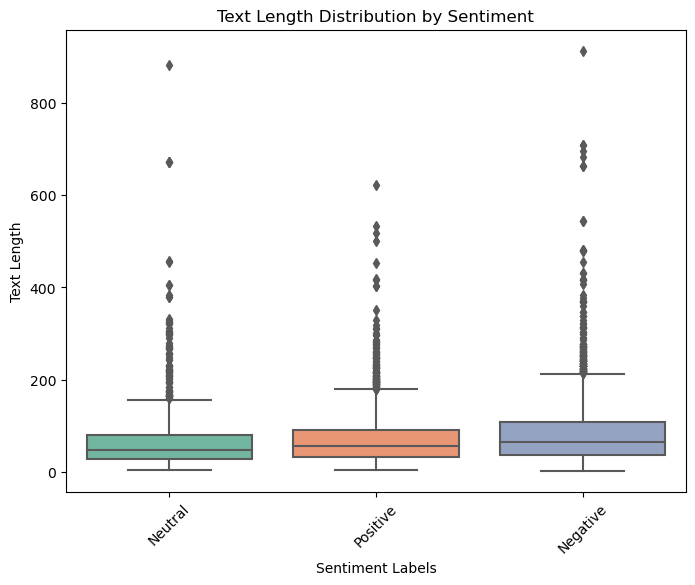

In [62]:
# Boxplot to show text length distribution by sentiment label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=df, palette='Set2')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment Labels')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.show()

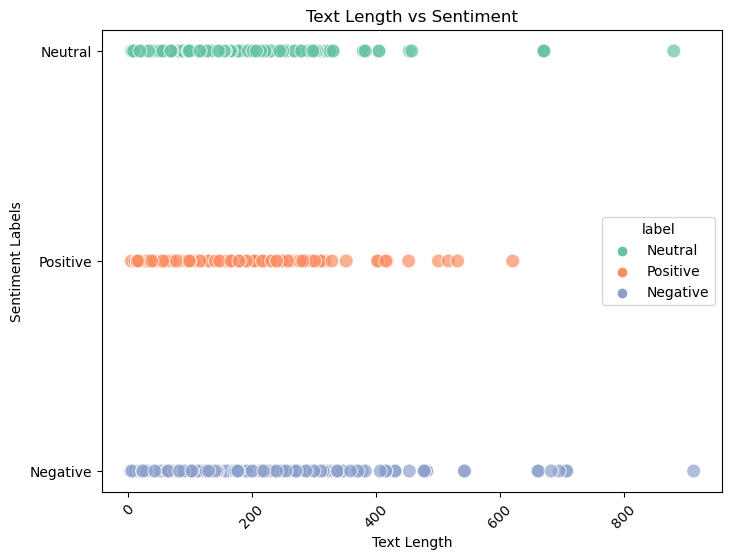

In [63]:
# Scatterplot to analyze the relationship between text length and sentiment labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='label', data=df, hue='label', palette='Set2', s=100, alpha=0.7)
plt.title('Text Length vs Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Labels')
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis Model Development

Split the Dataset into Training and Testing Sets

In [64]:
X = df['text']
y = df['label']

In [65]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
nepali_stop_words = list(stop_words)

In [67]:
vectorizer = TfidfVectorizer(stop_words=nepali_stop_words)

In [68]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Train Models with Different ML Algorithms

In [69]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)

In [70]:
# SVM
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)

In [71]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)

In [72]:
# Evaluate the models
print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))

Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.64      0.81      0.71       456
     Neutral       0.68      0.36      0.47       263
    Positive       0.76      0.76      0.76       479

    accuracy                           0.69      1198
   macro avg       0.69      0.64      0.65      1198
weighted avg       0.70      0.69      0.68      1198



In [73]:
print("SVM:")
print(classification_report(y_test, svm_predictions))

SVM:
              precision    recall  f1-score   support

    Negative       0.65      0.80      0.72       456
     Neutral       0.67      0.41      0.51       263
    Positive       0.79      0.80      0.79       479

    accuracy                           0.71      1198
   macro avg       0.71      0.67      0.67      1198
weighted avg       0.71      0.71      0.70      1198



In [74]:
print("Random Forest:")
print(classification_report(y_test, rf_predictions))

Random Forest:
              precision    recall  f1-score   support

    Negative       0.63      0.77      0.69       456
     Neutral       0.60      0.37      0.45       263
    Positive       0.77      0.77      0.77       479

    accuracy                           0.68      1198
   macro avg       0.67      0.64      0.64      1198
weighted avg       0.68      0.68      0.67      1198



Support Vector Machine (SVM) appears to be the best choice for this task because:

It achieves the highest overall accuracy.

It performs better in macro average F1-score, indicating balanced performance across all classes.

It handles the Neutral class better compared to other models, which is important for sentiment analysis.

In [75]:
# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.71


Hyperparameter Tuning

In [76]:
# Define the parameter grid
param_distributions = {
    'C': uniform(0.1, 100),           # Random sampling for C
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # Kernel type
    'gamma': ['scale', 'auto'],       # Kernel coefficient
    'degree': [2, 3, 4]               # Degree of polynomial kernel (if using 'poly')
}


In [77]:
svm = SVC()

In [78]:
random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_distributions,
    scoring='f1_macro',  # Choose a scoring metric (e.g., 'accuracy', 'f1_macro')
    n_iter=50,           # Number of parameter settings sampled
    cv=5,                # Number of folds in cross-validation
    verbose=2,           # For logging progress
    n_jobs=-1            # Use all available cores
)

In [79]:
# Perform the random search
random_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1660f1720>,
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   scoring='f1_macro', verbose=2)

In [80]:
# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Best Parameters: {'C': 6.9527343653790314, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score: 0.6413241817673516


In [81]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.66      0.74      0.70       456
     Neutral       0.61      0.48      0.53       263
    Positive       0.78      0.77      0.78       479

    accuracy                           0.70      1198
   macro avg       0.68      0.66      0.67      1198
weighted avg       0.69      0.70      0.69      1198



In [82]:
# Make predictions using the best SVM model
svm_predictions = best_model.predict(X_test_tfidf)

In [83]:
# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.70


In [84]:
joblib.dump(svm_model, 'svm_sentiment_model.pkl')

['svm_sentiment_model.pkl']

In [85]:
# Save the vectorizer (assuming you are using TF-IDF vectorizer)
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [86]:
df.to_csv('cleaned_news_dataset.csv', index=False)

# Making Predictions

In [87]:
# Load the trained SVM model and vectorizer
svm_model = joblib.load('svm_sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [95]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"  # other symbols
        "\U000024C2-\U0001F251"  # enclosed characters
        "]+", 
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  
    text = re.sub(r'[^ँ-ःअ-ऋए-औक-ह०-९a-zA-Z0-9\sािीुूेैोौंंः]', '', text) 
    text = re.sub(r'\s+', ' ', text) 
    return text.strip()

def preprocess_text(text):
    text = text.lower()
    text = remove_emojis(text)
    text = clean_text(text)
    return text
user_input = input("Enter Nepali text for sentiment prediction: ")
cleaned_text = preprocess_text(user_input)
X_new = vectorizer.transform([cleaned_text])
prediction = svm_model.predict(X_new)

print(f"Sentiment: {prediction[0]}")

Enter Nepali text for sentiment prediction: तिमीले दिएको सहयोगको म प्रशंसा गर्दिन। 
Sentiment: Negative
